### The Sparks Foundation

### Task2: Predict the optimum number of clusters and represent it visually using Unsupervised ML

#### Author: Sudhir Panwar

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
import seaborn as sns
%matplotlib inline

In [97]:
df = pd.read_csv('task2.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [123]:
df = df.drop('Id', axis = 1)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [100]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [101]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [102]:
import numpy as np

In [103]:
print(np.unique(df['Species']))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


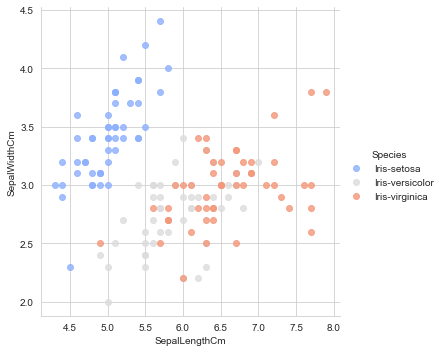

In [104]:
sns.set_style('whitegrid')
sns.lmplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = df, hue = 'Species', palette = 'coolwarm', fit_reg = False)

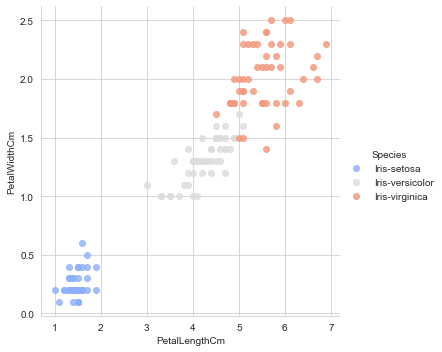

In [105]:
sns.set_style('whitegrid')
sns.lmplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = df, hue = 'Species', palette = 'coolwarm', fit_reg = False)

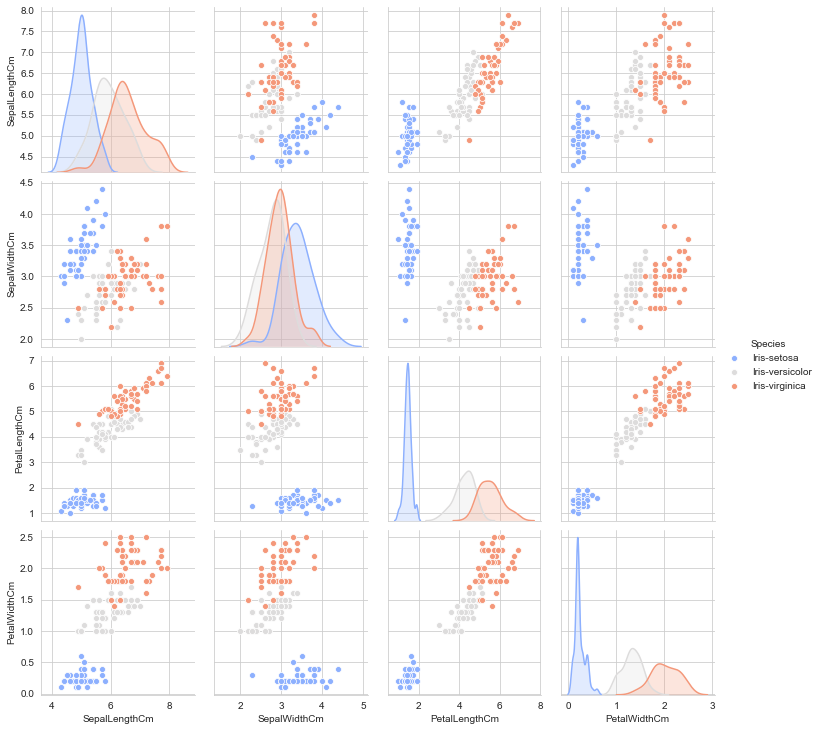

In [106]:
sns.pairplot(data = df, hue = 'Species', palette = 'coolwarm')

In [107]:
from sklearn.cluster import KMeans

In [108]:
features = df.drop(['Species'], axis = 1)

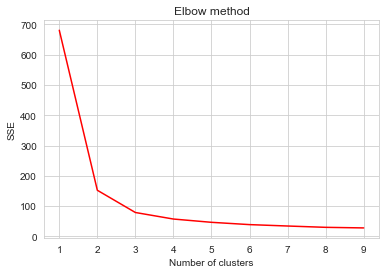

In [109]:
SSE = {}

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, max_iter = 1000).fit(features)
    df['Clusters'] = kmeans.labels_
    SSE[i] = kmeans.inertia_
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure()
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Within cluster sum of squares
plt.show()

In [110]:
kmeans = KMeans(n_clusters=3)

In [111]:
kmeans.fit(features)

KMeans(n_clusters=3)

In [112]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [113]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
150


In [114]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts = True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 62, 1: 50, 2: 38}


In [116]:
def cluster(mark):
    if mark == 'Iris-setosa':
        label = 1
    elif mark == 'Iris-versicolor':
        label = 2
    else:
        label = 0
    return label

In [117]:
df['Original_Clusters'] = df['Species'].apply(lambda x: cluster(x))

In [118]:
print(type(df['Original_Clusters']))
unique, counts = np.unique(df['Original_Clusters'], return_counts = True)
print(dict(zip(unique,counts)))

<class 'pandas.core.series.Series'>
{0: 50, 1: 50, 2: 50}


In [119]:
df['Clusters'] = kmeans.labels_

In [120]:
pd.crosstab(df.Original_Clusters, kmeans.labels_)

col_0,0,1,2
Original_Clusters,,,
0,14,0,36
1,0,50,0
2,48,0,2


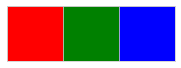

In [121]:
sns.set_style('whitegrid')
colors = ['Red','Green','Blue']
sns.set_palette(colors)
sns.palplot(colors)

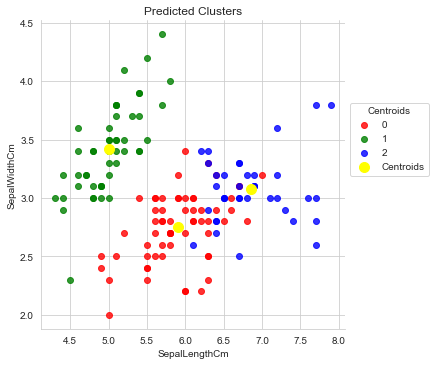

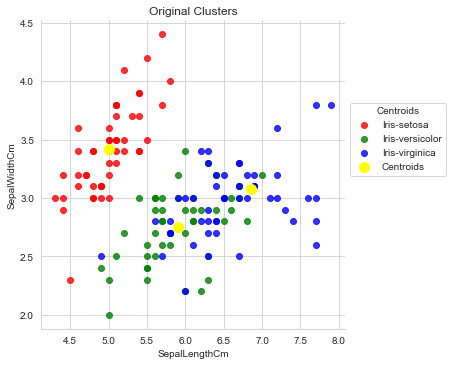

In [122]:
prediction = sns.lmplot(data = df, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Clusters', fit_reg = False, legend = False)
plt.title('Predicted Clusters')
leg = prediction.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Clusters", fancybox=True)

for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = colors[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
leg = plt.legend(bbox_to_anchor=[1, 0.75],
                         title="Centroids", fancybox=True)

# ploting the given clusters
original = sns.lmplot(data = df, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', fit_reg = False, legend = False)
plt.title('Original Clusters')
leg = original.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Clusters", fancybox=True)

for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = colors[i])#plt.title('Original Clusters')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
leg = plt.legend(bbox_to_anchor=[1, 0.75],
                         title="Centroids", fancybox=True)

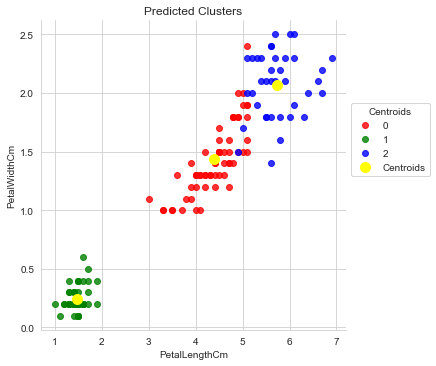

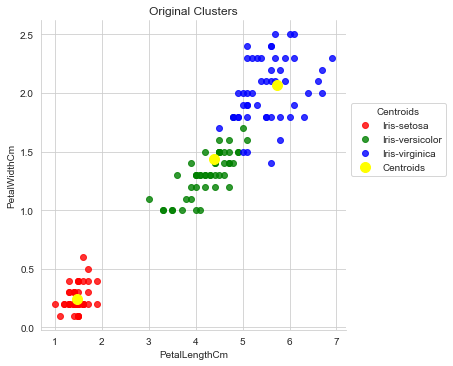

In [124]:
prediction = sns.lmplot(data = df, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Clusters', sharey = True, fit_reg = False, legend = False)
plt.title('Predicted Clusters')
leg = prediction.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Clusters", fancybox=True)

for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = colors[i])
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
leg = plt.legend(bbox_to_anchor=[1, 0.75],
                         title="Centroids", fancybox=True)


original = sns.lmplot(data = df, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', sharey = True, fit_reg = False, legend = False)
plt.title('Original Clusters')
leg = original.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Clusters", fancybox=True)

for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = colors[i])

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
leg = plt.legend(bbox_to_anchor=[1, 0.75],
                         title="Centroids", fancybox=True)

### The End !